In [ ]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels)= imdb.load_data(num_words= 10000)

#train_data와 test_data는 리뷰의 목록을 의미하며 각 리뷰는 단어 인덱스의 리스트(단어 시퀸스가 인코딩된 것)를 의미
#train_labels와 test_labels는 부정을 타내는 0과 긍정을 나타내는 1의 리스트를 의미
#num_words= 10000인 이유는 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미
#이렇게 하면 적절한 크기의 벡터 데이터를 얻을 수있음

In [2]:
train_data[0]



[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [26]:

train_labels[0]

1

In [25]:
max([max(sequence) for sequence in train_data])

# 가장 자주 등장하는 1만 개로 제한했기 때문에 단어 인덱스는 9999를 넘지 않음 


9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#  0,1,2는 각각 '패딩', '문서시작', '사전에 없음'을 나타내기 위한 인덱스이므로 디코딩할 때마다 3을 뺌 

1646592/1641221 [==============================] - 1s 1us/step


In [31]:
decoded_review
#결과 

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [30]:
###정수 시퀸스를 이진 행렬로 인코딩

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results


x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 신경망에 주입할 데이터 준비 완료

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#relu와 같은 활성화 함수가 없다면 Dense 층은 선형적인 연산인접곱과 덧셈 2개로 구성됨 -> output =dot(W, input)+b
#가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해서는 비선형성 또는 활성화 함수를 추가해야 함

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#모델 컴파일하기 
#크로스 엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정함 
#rmsprop 옵티마이저와 binary_crossentropy 손실함수로 모델을 설정함 

In [13]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
#옵티마이저 설정

In [14]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#손실과 측정을 함수 객체로 지정

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

##검증 세트 준비 

In [17]:
model.compile (optimizer = 'rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

##에포크 1회가 진행 될때마다 1만 개의 검증 샘플 데이터에서 손실과 정확도를 계산함 

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 31s 2ms/step - loss: 0.5520 - acc: 0.7845 - val_loss: 0.4431 - val_acc: 0.8603
Epoch 2/20
15000/15000 [==============================] - 12s 789us/step - loss: 0.3498 - acc: 0.8978 - val_loss: 0.3308 - val_acc: 0.8864
Epoch 3/20
15000/15000 [==============================] - 12s 767us/step - loss: 0.2525 - acc: 0.9230 - val_loss: 0.2907 - val_acc: 0.8866
Epoch 4/20
15000/15000 [==============================] - 12s 780us/step - loss: 0.1978 - acc: 0.9365 - val_loss: 0.2761 - val_acc: 0.8916
Epoch 5/20
15000/15000 [==============================] - 12s 777us/step - loss: 0.1614 - acc: 0.9499 - val_loss: 0.2813 - val_acc: 0.8868
Epoch 6/20
15000/15000 [==============================] - 13s 852us/step - loss: 0.1342 - acc: 0.9581 - val_loss: 0.2851 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 9s 590us/ste

In [18]:
history_dict = history.history
history_dict.keys()

## history_dict은 훈련과 검증하는 동안 모니터링할 측정 지표당 하나씩 모두 4개의 항목을 담고 있음 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
importib.pyplot as plt

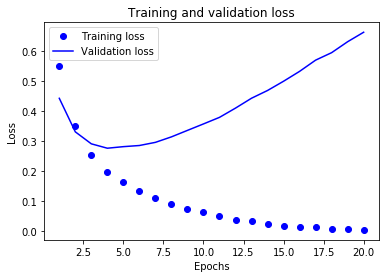

In [20]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

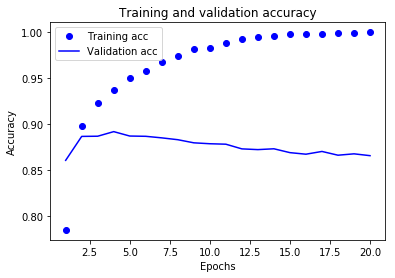

In [21]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
#이와 같은 결과를 통해 훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가 

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 18s 712us/step - loss: 0.4470 - acc: 0.8306
Epoch 2/4
25000/25000 [==============================] - 14s 562us/step - loss: 0.2575 - acc: 0.9087
Epoch 3/4
25000/25000 [==============================] - 14s 560us/step - loss: 0.1998 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 33s 1ms/step


In [23]:
results

[0.2998486262989044, 0.88116]

In [24]:
model.predict(x_test)

array([[0.1288931 ],
       [0.99993974],
       [0.7956114 ],
       ...,
       [0.10113943],
       [0.06315604],
       [0.4561002 ]], dtype=float32)